# Introduction

This notebook backtests 100 stock tickers. After reading in the stock tickers from a CSV file, it calls `backtester()` to do all the hard work. This is basically a wrapper for the `backtester()`. The `backtester()` is stored in backtest.py.

In [1]:
from backtest import ticker_stats, smooth, features, stringify, print_ticker_heading, balanced_scorecard, \
                     determine_minima_n_maxima, align_minima_n_maxima, plot_trades, split_data, \
                     get_signals, merge_buy_n_sell_signals, extract_trades, get_possible_trades, \
                     backtester
import pandas as pd
import numpy as np

from   frankie     import DayForecast, optimize, baseline, cross_val_tpr
import yfinance as yf

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer, load_iris, make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from category_encoders import WOEEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import savgol_filter, argrelmin, argrelmax

import gc; gc.enable()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# suppress output of plotting all the trades as this is quite a lot...
# plot_trades(tickers, min_indices, max_indices)

In [4]:
DATAPATH = '/Users/frkornet/Flatiron/Stock-Market-Final-Project/data/'
sdf = pd.read_csv(f'{DATAPATH}stocks_100.csv')
idx = (sdf.TICKER > '')
sdf = sdf.loc[idx].reset_index()
tickers = sdf.TICKER.to_list()

In [5]:
%time myPnL_df, my_Capital_df, possible_trades_df = backtester(tickers)

Simulating 97 stocks
Unable to determine minima and maxima for the following tickers:
[]
Simulating now with 97 stocks
tickers= ['ADRO', 'AGRX', 'AA', 'ALXN', 'AMT', 'AMWD', 'PLAN', 'BOCH', 'BB', 'BMCH', 'BXP', 'BHF', 'BLDR', 'BFST', 'CPB', 'CBL', 'CRL', 'CVX', 'CYD', 'JVA', 'CUTR', 'CVI', 'DRI', 'DLX', 'DERM', 'DSGX', 'DVN', 'DRQ', 'EPM', 'EXLS', 'FCFS', 'FHB', 'FOR', 'RAIL', 'FEIM', 'FTEK', 'GS', 'GGG', 'GWB', 'GPRE', 'GRIF', 'GRPN', 'GURE', 'HWC', 'HLT', 'IPG', 'INVH', 'IQV', 'JELD', 'LIND', 'MIC', 'MBI', 'MEDP', 'MDP', 'VIVO', 'MLND', 'MRC', 'MVBF', 'NKSH', 'FIZZ', 'OTEX', 'OPTN', 'OPCH', 'ORC', 'OBNK', 'ORIT', 'OMI', 'PCAR', 'PANW', 'PEBK', 'PRSP', 'PSDO', 'PGR', 'PRPL', 'REGN', 'RM', 'SEEL', 'SIBN', 'SLG', 'SPTN', 'SPPI', 'SYX', 'TANH', 'TGT', 'TXRH', 'TTSH', 'TOWN', 'CLUB', 'TRNS', 'TGA', 'TRIP', 'ULH', 'USPH', 'VZ', 'VSH', 'WSTG', 'WBT']
Possible trades to simulate: 981
before day_close: 2017-02-03 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-02-03 00:00:00 0 10000 0 1

after buy: invested in ['ORIT', 'SYX', 'TOWN', 'TGT'] (4
capital=9983.209436019428 in_use=7965.195044107444 free=2018.014391911984
*** buying 1996.6418872038855 in DRQ on 2017-03-21 00:00:00 with target sell date of 2017-05-22 00:00:00
enough money (2018.014391911984) to buy DRQ (capital=9983.209436019428
invested in: ['ORIT', 'SYX', 'TOWN', 'TGT'] (4
after buy: invested in ['ORIT', 'SYX', 'TOWN', 'TGT', 'DRQ'] (5
capital=9983.209436019428 in_use=9961.836931311329 free=21.372504708098404
before day_close: 2017-03-21 00:00:00 5 9983.209436019428 9961.836931311329 21.372504708098404 4.547473508864641e-13 True
after day_close: 2017-03-21 00:00:00 5 9812.469561653961 9791.097056945862 21.372504708098404 4.547473508864641e-13 True
*** buying 1962.4939123307922 in CPB on 2017-03-22 00:00:00 with target sell date of 2017-05-26 00:00:00
*** selling DRQ on 2017-03-22 00:00:00 to free up money for CPB
profit of selling DRQ on 2017-03-22 00:00:00:  -13.374634651126598 -0.67%
enough money (2004.63

after buy: invested in ['ORIT', 'SYX', 'TGT', 'CVI', 'CRL'] (5
capital=10745.104264438887 in_use=10745.104264438887 free=0.0
*** buying 2149.0208528877774 in DLX on 2017-04-03 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: DLX is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'SYX', 'TGT', 'CVI', 'CRL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'SYX', 'TGT', 'CVI', 'CRL'] (5
capital=10745.104264438887 in_use=10745.104264438887 free=0.0
before day_close: 2017-04-03 00:00:00 5 10745.104264438887 10745.104264438887 0.0 0.0 True
after day_close: 2017-04-03 00:00:00 5 10830.332267071844 10830.332267071844 0.0 0.0 True
*** buying 2166.066453414369 in OPCH on 2017-04-04 00:00:00 with target sell date of 2017-05-15 00:00:00
*** selling CRL on 2017-04-04 00:00:00 to free up money for OPCH
profit of selling CRL on 2017-04-04 00:00:00:  -28.66986896325625 -1.53%
enough money (1843.6609165422508) to buy OPCH 

after day_close: 2017-04-25 00:00:00 5 11095.150706172897 10002.771118158702 1092.3795880141965 1.3642420526593924e-12 True

before day_close: 2017-04-26 00:00:00 5 11095.150706172897 10002.771118158702 1092.3795880141965 1.3642420526593924e-12 True
after day_close: 2017-04-26 00:00:00 5 10981.538874991846 9889.15928697765 1092.3795880141965 1.3642420526593924e-12 True
*** buying 2196.307774998369 in MBI on 2017-04-27 00:00:00 with target sell date of 2017-06-14 00:00:00
maxed out: MBI is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'TGT', 'CVI', 'OPCH', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'TGT', 'CVI', 'OPCH', 'TRNS'] (5
capital=10981.538874991846 in_use=9889.15928697765 free=1092.3795880141965
*** buying 2196.307774998369 in DSGX on 2017-04-27 00:00:00 with target sell date of 2017-05-04 00:00:00
maxed out: DSGX is not expected to perform better than stocks already invested in
invested in: ['ORIT'

after buy: invested in ['ORIT', 'TGT', 'TRNS', 'PCAR', 'BLDR'] (5
capital=11633.02531017837 in_use=10860.21201621688 free=772.8132939614952

before day_close: 2017-05-15 00:00:00 5 11633.02531017837 10860.21201621688 772.8132939614952 5.4569682106375694e-12 True
after day_close: 2017-05-15 00:00:00 5 11676.85967575363 10904.04638179214 772.8132939614952 5.4569682106375694e-12 True

before day_close: 2017-05-16 00:00:00 5 11676.85967575363 10904.04638179214 772.8132939614952 5.4569682106375694e-12 True
after day_close: 2017-05-16 00:00:00 5 11696.83753056194 10924.02423660045 772.8132939614952 5.4569682106375694e-12 True
*** buying 2339.3675061123877 in SPPI on 2017-05-17 00:00:00 with target sell date of 2017-07-06 00:00:00
*** selling BLDR on 2017-05-17 00:00:00 to free up money for SPPI
profit of selling BLDR on 2017-05-17 00:00:00:  -72.3546840301351 -3.11%
enough money (3027.0636719670338) to buy SPPI (capital=11592.325209185077
invested in: ['ORIT', 'TGT', 'TRNS', 'PCAR'] (4
after

after buy: invested in ['ORIT', 'TRNS', 'OTEX', 'AMT', 'CVI'] (5
capital=11616.272886196806 in_use=11119.897424297575 free=496.37546189923296

before day_close: 2017-06-05 00:00:00 5 11616.272886196806 11119.897424297575 496.37546189923296 1.3642420526593924e-12 True
after day_close: 2017-06-05 00:00:00 5 11601.531451677949 11105.155989778717 496.37546189923296 1.3642420526593924e-12 True

before day_close: 2017-06-06 00:00:00 5 11601.531451677949 11105.155989778717 496.37546189923296 1.3642420526593924e-12 True
after day_close: 2017-06-06 00:00:00 5 11570.553851774228 11074.178389874996 496.37546189923296 1.3642420526593924e-12 True
*** buying 2314.1107703548455 in VZ on 2017-06-07 00:00:00 with target sell date of 2017-06-15 00:00:00
maxed out: VZ is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'TRNS', 'OTEX', 'AMT', 'CVI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'TRNS', 'OTEX', 'AMT', 'CVI'] (5
capital=11570

after buy: invested in ['ORIT', 'TRNS', 'OTEX', 'TGT', 'HWC'] (5
capital=11612.909929090623 in_use=11049.440625883184 free=563.469303207437
*** buying 2322.581985818125 in AMWD on 2017-06-28 00:00:00 with target sell date of 2017-07-10 00:00:00
*** selling HWC on 2017-06-28 00:00:00 to free up money for AMWD
profit of selling HWC on 2017-06-28 00:00:00:  0.0 0.0%
enough money (2886.051289025562) to buy AMWD (capital=11612.909929090623
invested in: ['ORIT', 'TRNS', 'OTEX', 'TGT'] (4
after buy: invested in ['ORIT', 'TRNS', 'OTEX', 'TGT', 'AMWD'] (5
capital=11612.909929090623 in_use=11049.440625883184 free=563.469303207437
*** buying 2322.581985818125 in BB on 2017-06-28 00:00:00 with target sell date of 2017-07-24 00:00:00
maxed out: BB is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'TRNS', 'OTEX', 'TGT', 'AMWD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'TRNS', 'OTEX', 'TGT', 'AMWD'] (5
capital=11612.909929090623

after buy: invested in ['ORIT', 'TRNS', 'TGT', 'AMT', 'SYX'] (5
capital=11988.028189484454 in_use=11386.416332496967 free=601.6118569874861

before day_close: 2017-07-20 00:00:00 5 11988.028189484454 11386.416332496967 601.6118569874861 9.094947017729282e-13 True
after day_close: 2017-07-20 00:00:00 5 12043.613127939874 11442.001270952387 601.6118569874861 9.094947017729282e-13 True

before day_close: 2017-07-21 00:00:00 5 12043.613127939874 11442.001270952387 601.6118569874861 9.094947017729282e-13 True
after day_close: 2017-07-21 00:00:00 5 12023.439219320864 11421.827362333377 601.6118569874861 9.094947017729282e-13 True
*** buying 2404.687843864173 in FHB on 2017-07-24 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: FHB is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'TRNS', 'TGT', 'AMT', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'TRNS', 'TGT', 'AMT', 'SYX'] (5
capital=12023.4392193208

after buy: invested in ['ORIT', 'SYX', 'CVI', 'VIVO'] (4
capital=12858.746379347063 in_use=10073.535586485752 free=2785.210792861314
*** buying 2571.7492758694125 in BB on 2017-08-04 00:00:00 with target sell date of 2017-09-08 00:00:00
enough money (2785.210792861314) to buy BB (capital=12858.746379347063
invested in: ['ORIT', 'SYX', 'CVI', 'VIVO'] (4
after buy: invested in ['ORIT', 'SYX', 'CVI', 'VIVO', 'BB'] (5
capital=12858.746379347063 in_use=12645.284862355165 free=213.4615169919016

before day_close: 2017-08-04 00:00:00 5 12858.746379347063 12645.284862355165 213.4615169919016 3.637978807091713e-12 True
after day_close: 2017-08-04 00:00:00 5 13020.891877910251 12807.430360918353 213.4615169919016 3.637978807091713e-12 True

before day_close: 2017-08-07 00:00:00 5 13020.891877910251 12807.430360918353 213.4615169919016 3.637978807091713e-12 True
after day_close: 2017-08-07 00:00:00 5 12645.119097529578 12431.65758053768 213.4615169919016 3.637978807091713e-12 True
*** buying 2529

after buy: invested in ['ORIT', 'SYX', 'CVI', 'TRNS', 'DLX'] (5
capital=12201.546639853583 in_use=12080.752138428918 free=120.79450142466976

before day_close: 2017-08-22 00:00:00 5 12201.546639853583 12080.752138428918 120.79450142466976 4.547473508864641e-12 True
after day_close: 2017-08-22 00:00:00 5 12269.763979732385 12148.96947830772 120.79450142466976 4.547473508864641e-12 True

before day_close: 2017-08-23 00:00:00 5 12269.763979732385 12148.96947830772 120.79450142466976 4.547473508864641e-12 True
after day_close: 2017-08-23 00:00:00 5 12350.102018852296 12229.307517427631 120.79450142466976 4.547473508864641e-12 True

before day_close: 2017-08-24 00:00:00 5 12350.102018852296 12229.307517427631 120.79450142466976 4.547473508864641e-12 True
after day_close: 2017-08-24 00:00:00 5 12324.803939812722 12204.009438388057 120.79450142466976 4.547473508864641e-12 True
invested in: ['ORIT', 'SYX', 'CVI', 'TRNS', 'DLX'] (5
capital=12324.803939812722 in_use=12204.009438388057 free=120.7

after day_close: 2017-09-22 00:00:00 5 13186.581692346253 12641.665615543754 544.9160768025076 8.185452315956354e-12 True
*** buying 2637.3163384692507 in DRI on 2017-09-25 00:00:00 with target sell date of 2017-10-12 00:00:00
maxed out: DRI is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'TRNS', 'SLG', 'PGR', 'VZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'TRNS', 'SLG', 'PGR', 'VZ'] (5
capital=13186.581692346253 in_use=12641.665615543754 free=544.9160768025076

before day_close: 2017-09-25 00:00:00 5 13186.581692346253 12641.665615543754 544.9160768025076 8.185452315956354e-12 True
after day_close: 2017-09-25 00:00:00 5 13191.301607102523 12646.385530300024 544.9160768025076 8.185452315956354e-12 True
invested in: ['ORIT', 'TRNS', 'SLG', 'PGR', 'VZ'] (5
capital=13191.301607102523 in_use=12646.385530300024 free=544.9160768025076
*** selling PGR on 2017-09-26 00:00:00
profit of selling PGR on 2017-09-26 00:00:00:

after day_close: 2017-10-12 00:00:00 3 13621.34328987245 8117.7462912206565 5503.596998651796 2.7284841053187847e-12 True
invested in: ['AMT', 'IPG', 'BLDR'] (3
capital=13621.34328987245 in_use=8117.7462912206565 free=5503.596998651796
*** selling AMT on 2017-10-13 00:00:00
profit of selling AMT on 2017-10-13 00:00:00:  74.60225804859238 2.84%
after selling invested in: ['IPG', 'BLDR'] (2
capital=13620.335151250172 in_use=5417.144549861617 free=8203.190601388556
*** buying 2724.0670302500343 in DRI on 2017-10-13 00:00:00 with target sell date of 2017-11-03 00:00:00
enough money (8203.190601388556) to buy DRI (capital=13620.335151250172
invested in: ['IPG', 'BLDR'] (2
after buy: invested in ['IPG', 'BLDR', 'DRI'] (3
capital=13620.335151250172 in_use=8141.211580111651 free=5479.123571138522

before day_close: 2017-10-13 00:00:00 3 13620.335151250172 8141.211580111651 5479.123571138522 0.0 True
after day_close: 2017-10-13 00:00:00 3 13637.758320924302 8158.6347497857805 5479.123571138522 

after buy: invested in ['DRI', 'AMT', 'JVA', 'GRIF', 'TRNS'] (5
capital=13705.500848287487 in_use=13690.174633600565 free=15.326214686920594

before day_close: 2017-10-27 00:00:00 5 13705.500848287487 13690.174633600565 15.326214686920594 1.3642420526593924e-12 True
after day_close: 2017-10-27 00:00:00 5 13716.768416655414 13701.442201968492 15.326214686920594 1.3642420526593924e-12 True
*** buying 2743.3536833310827 in GRPN on 2017-10-30 00:00:00 with target sell date of 2017-11-13 00:00:00
*** selling JVA on 2017-10-30 00:00:00 to free up money for GRPN
profit of selling JVA on 2017-10-30 00:00:00:  -131.67071203965725 -4.81%
enough money (2623.6603198534667) to buy GRPN (capital=13603.907806335708
invested in: ['DRI', 'AMT', 'GRIF', 'TRNS'] (4
you do not have 2623.6603198534667 and setting amount to 2623.6603198534667
after buy: invested in ['DRI', 'AMT', 'GRIF', 'TRNS', 'GRPN'] (5
capital=13603.907806335708 in_use=13603.907806335705 free=0.0
*** buying 2720.7815612671416 in SLG on 

after buy: invested in ['AMT', 'TRNS', 'SLG', 'TGT', 'ORIT'] (5
capital=13661.734981128984 in_use=13532.332575496906 free=129.40240563207362

before day_close: 2017-11-10 00:00:00 5 13661.734981128984 13532.332575496906 129.40240563207362 4.092726157978177e-12 True
after day_close: 2017-11-10 00:00:00 5 13733.3349580666 13603.932552434522 129.40240563207362 4.092726157978177e-12 True
*** buying 2746.66699161332 in VZ on 2017-11-13 00:00:00 with target sell date of 2017-12-27 00:00:00
*** selling SLG on 2017-11-13 00:00:00 to free up money for VZ
profit of selling SLG on 2017-11-13 00:00:00:  153.65816394033072 5.86%
enough money (2906.7208894258715) to buy VZ (capital=13738.16507716885
invested in: ['AMT', 'TRNS', 'TGT', 'ORIT'] (4
after buy: invested in ['AMT', 'TRNS', 'TGT', 'ORIT', 'VZ'] (5
capital=13738.16507716885 in_use=13578.111179356294 free=160.05389781255144
*** buying 2747.6330154337697 in HWC on 2017-11-13 00:00:00 with target sell date of 2017-11-27 00:00:00
maxed out: HWC

after buy: invested in ['TGT', 'ORIT', 'VSH', 'CRL', 'MRC'] (5
capital=14252.426909535865 in_use=13730.275072770099 free=522.1518367657609
*** buying 2850.485381907173 in GRIF on 2017-11-29 00:00:00 with target sell date of 2017-11-30 00:00:00
*** selling MRC on 2017-11-29 00:00:00 to free up money for GRIF
profit of selling MRC on 2017-11-29 00:00:00:  0.0 0.0%
enough money (3372.637218672934) to buy GRIF (capital=14252.426909535865
invested in: ['TGT', 'ORIT', 'VSH', 'CRL'] (4
after buy: invested in ['TGT', 'ORIT', 'VSH', 'CRL', 'GRIF'] (5
capital=14252.426909535865 in_use=13730.275072770099 free=522.1518367657609

before day_close: 2017-11-29 00:00:00 5 14252.426909535865 13730.275072770099 522.1518367657609 5.4569682106375694e-12 True
after day_close: 2017-11-29 00:00:00 5 14338.19184155893 13816.040004793163 522.1518367657609 5.4569682106375694e-12 True
invested in: ['TGT', 'ORIT', 'VSH', 'CRL', 'GRIF'] (5
capital=14338.19184155893 in_use=13816.040004793163 free=522.1518367657609


after day_close: 2017-12-22 00:00:00 5 14400.124205474009 14222.363718588773 177.76048688522997 5.9117155615240335e-12 True
*** buying 2880.0248410948016 in GWB on 2017-12-26 00:00:00 with target sell date of 2017-12-28 00:00:00
maxed out: GWB is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ORIT', 'CRL', 'PANW', 'AMT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ORIT', 'CRL', 'PANW', 'AMT'] (5
capital=14400.124205474009 in_use=14222.363718588773 free=177.76048688522997
*** buying 2880.0248410948016 in BXP on 2017-12-26 00:00:00 with target sell date of 2018-03-19 00:00:00
maxed out: BXP is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ORIT', 'CRL', 'PANW', 'AMT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ORIT', 'CRL', 'PANW', 'AMT'] (5
capital=14400.124205474009 in_use=14222.363718588773 free=177.76048688522997

before day_close: 2017-12-26 00

profit of selling TRNS on 2018-01-17 00:00:00:  118.047308254163 4.07%
after selling invested in: ['TGT', 'ORIT', 'PANW', 'AMT'] (4
capital=14925.00839615314 in_use=11581.06368311431 free=3343.9447130388244
*** buying 2985.001679230628 in FOR on 2018-01-17 00:00:00 with target sell date of 2018-02-09 00:00:00
enough money (3343.9447130388244) to buy FOR (capital=14925.00839615314
invested in: ['TGT', 'ORIT', 'PANW', 'AMT'] (4
after buy: invested in ['TGT', 'ORIT', 'PANW', 'AMT', 'FOR'] (5
capital=14925.00839615314 in_use=14566.065362344936 free=358.94303380819656

before day_close: 2018-01-17 00:00:00 5 14925.00839615314 14566.065362344936 358.94303380819656 7.275957614183426e-12 True
after day_close: 2018-01-17 00:00:00 5 15100.22419528484 14741.281161476638 358.94303380819656 5.4569682106375694e-12 True

before day_close: 2018-01-18 00:00:00 5 15100.22419528484 14741.281161476638 358.94303380819656 5.4569682106375694e-12 True
after day_close: 2018-01-18 00:00:00 5 15159.795393471159 

after buy: invested in ['TGT', 'ORIT', 'PANW', 'CVI', 'OPCH'] (5
capital=14977.6644620739 in_use=14879.857121425941 free=97.80734064795615
*** buying 2995.5328924147802 in DLX on 2018-02-05 00:00:00 with target sell date of 2018-04-04 00:00:00
maxed out: DLX is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ORIT', 'PANW', 'CVI', 'OPCH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ORIT', 'PANW', 'CVI', 'OPCH'] (5
capital=14977.6644620739 in_use=14879.857121425941 free=97.80734064795615
*** buying 2995.5328924147802 in GS on 2018-02-05 00:00:00 with target sell date of 2018-02-16 00:00:00
maxed out: GS is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ORIT', 'PANW', 'CVI', 'OPCH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ORIT', 'PANW', 'CVI', 'OPCH'] (5
capital=14977.6644620739 in_use=14879.857121425941 free=97.80734064795615

before day_close: 20

after buy: invested in ['PANW', 'OPCH', 'SYX', 'AMWD'] (4
capital=15292.011842953325 in_use=12644.179236597534 free=2647.832606355788

before day_close: 2018-02-23 00:00:00 4 15292.011842953325 12644.179236597534 2647.832606355788 2.7284841053187847e-12 True
after day_close: 2018-02-23 00:00:00 4 15428.744221456049 12780.911615100258 2647.832606355788 2.7284841053187847e-12 True
*** buying 3085.74884429121 in CVX on 2018-02-26 00:00:00 with target sell date of 2018-03-13 00:00:00
enough money (2647.832606355788) to buy CVX (capital=15428.744221456049
invested in: ['PANW', 'OPCH', 'SYX', 'AMWD'] (4
you do not have 2647.832606355788 and setting amount to 2647.832606355788
after buy: invested in ['PANW', 'OPCH', 'SYX', 'AMWD', 'CVX'] (5
capital=15428.744221456049 in_use=15428.744221456047 free=0.0

before day_close: 2018-02-26 00:00:00 5 15428.744221456049 15428.744221456047 0.0 1.8189894035458565e-12 True
after day_close: 2018-02-26 00:00:00 5 15594.752665475813 15594.75266547581 0.0 3.6

after buy: invested in ['SYX', 'TGT', 'TRNS', 'OPCH', 'VSH'] (5
capital=15176.015523860648 in_use=14882.449788301583 free=293.56573555905925

before day_close: 2018-03-09 00:00:00 5 15176.015523860648 14882.449788301583 293.56573555905925 5.4569682106375694e-12 True
after day_close: 2018-03-09 00:00:00 5 15421.231155390185 15127.665419831123 293.56573555905925 3.637978807091713e-12 True
*** buying 3084.246231078037 in GRIF on 2018-03-12 00:00:00 with target sell date of 2018-03-14 00:00:00
maxed out: GRIF is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGT', 'TRNS', 'OPCH', 'VSH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGT', 'TRNS', 'OPCH', 'VSH'] (5
capital=15421.231155390185 in_use=15127.665419831123 free=293.56573555905925

before day_close: 2018-03-12 00:00:00 5 15421.231155390185 15127.665419831123 293.56573555905925 3.637978807091713e-12 True
after day_close: 2018-03-12 00:00:00 5 15631.90887574922 15338

after buy: invested in ['TGT', 'TRNS', 'OTEX', 'AMT', 'CRL'] (5
capital=15005.217515408129 in_use=15005.217515408127 free=0.0
*** buying 3001.0435030816257 in TOWN on 2018-04-04 00:00:00 with target sell date of 2018-04-26 00:00:00
maxed out: TOWN is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'OTEX', 'AMT', 'CRL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'OTEX', 'AMT', 'CRL'] (5
capital=15005.217515408129 in_use=15005.217515408127 free=0.0

before day_close: 2018-04-04 00:00:00 5 15005.217515408129 15005.217515408127 0.0 1.8189894035458565e-12 True
after day_close: 2018-04-04 00:00:00 5 15149.781961028213 15149.78196102821 0.0 3.637978807091713e-12 True
*** buying 3029.9563922056427 in FOR on 2018-04-05 00:00:00 with target sell date of 2018-05-08 00:00:00
maxed out: FOR is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'OTEX', 'AMT', 'CRL'] (5)

not e

after day_close: 2018-04-19 00:00:00 5 15247.641983463247 15233.40945383003 14.232529633214654 1.8189894035458565e-12 True

before day_close: 2018-04-20 00:00:00 5 15247.641983463247 15233.40945383003 14.232529633214654 1.8189894035458565e-12 True
after day_close: 2018-04-20 00:00:00 5 15265.65770964518 15251.425180011964 14.232529633214654 1.8189894035458565e-12 True
invested in: ['TRNS', 'AMT', 'CRL', 'SYX', 'BOCH'] (5
capital=15265.65770964518 in_use=15251.425180011964 free=14.232529633214654
*** selling TRNS on 2018-04-23 00:00:00
profit of selling TRNS on 2018-04-23 00:00:00:  491.5389524085617 15.93%
after selling invested in: ['AMT', 'CRL', 'SYX', 'BOCH'] (4
capital=15349.323914310467 in_use=11758.36113523623 free=3590.9627790742366

before day_close: 2018-04-23 00:00:00 4 15349.323914310467 11758.36113523623 3590.9627790742366 1.3642420526593924e-12 True
after day_close: 2018-04-23 00:00:00 4 15398.289247524139 11807.3264684499 3590.9627790742366 1.3642420526593924e-12 True
***

after buy: invested in ['AMT', 'CRL', 'ORIT', 'TGT', 'PCAR'] (5
capital=15753.186777990202 in_use=15132.034564679083 free=621.1522133111157

before day_close: 2018-05-15 00:00:00 5 15753.186777990202 15132.034564679083 621.1522133111157 3.637978807091713e-12 True
after day_close: 2018-05-15 00:00:00 5 15683.837948206972 15062.685734895853 621.1522133111157 3.637978807091713e-12 True

before day_close: 2018-05-16 00:00:00 5 15683.837948206972 15062.685734895853 621.1522133111157 3.637978807091713e-12 True
after day_close: 2018-05-16 00:00:00 5 15792.51716191782 15171.3649486067 621.1522133111157 3.637978807091713e-12 True
*** buying 3158.503432383564 in IQV on 2018-05-17 00:00:00 with target sell date of 2018-08-10 00:00:00
*** selling PCAR on 2018-05-17 00:00:00 to free up money for IQV
profit of selling PCAR on 2018-05-17 00:00:00:  38.17632246700077 1.21%
enough money (3809.965891376157) to buy IQV (capital=15811.059947116079
invested in: ['AMT', 'CRL', 'ORIT', 'TGT'] (4
after buy: i

after buy: invested in ['ORIT', 'TGT', 'IQV', 'OPCH', 'GWB'] (5
capital=16893.925903535288 in_use=16608.62092927852 free=285.3049742567614

before day_close: 2018-06-14 00:00:00 5 16893.925903535288 16608.62092927852 285.3049742567614 5.9117155615240335e-12 True
after day_close: 2018-06-14 00:00:00 5 17024.702368837832 16739.397394581065 285.3049742567614 5.9117155615240335e-12 True
invested in: ['ORIT', 'TGT', 'IQV', 'OPCH', 'GWB'] (5
capital=17024.702368837832 in_use=16739.397394581065 free=285.3049742567614
*** selling GWB on 2018-06-15 00:00:00
profit of selling GWB on 2018-06-15 00:00:00:  4.860395848535973 0.14%
after selling invested in: ['ORIT', 'TGT', 'IQV', 'OPCH'] (4
capital=17029.56276468637 in_use=13360.612213874008 free=3668.950550812355
*** buying 3405.9125529372736 in HWC on 2018-06-15 00:00:00 with target sell date of 2018-08-08 00:00:00
enough money (3668.950550812355) to buy HWC (capital=17029.56276468637
invested in: ['ORIT', 'TGT', 'IQV', 'OPCH'] (4
after buy: inve

after buy: invested in ['TGT', 'IQV', 'VZ', 'CVI', 'HLT'] (5
capital=16910.283908167246 in_use=16546.472958577808 free=363.8109495894241
*** buying 3382.056781633449 in PCAR on 2018-06-28 00:00:00 with target sell date of 2018-07-18 00:00:00
*** selling HLT on 2018-06-28 00:00:00 to free up money for PCAR
profit of selling HLT on 2018-06-28 00:00:00:  4.547473508864641e-13 0.0%
enough money (3745.8677312228738) to buy PCAR (capital=16910.283908167246
invested in: ['TGT', 'IQV', 'VZ', 'CVI'] (4
after buy: invested in ['TGT', 'IQV', 'VZ', 'CVI', 'PCAR'] (5
capital=16910.283908167246 in_use=16546.472958577808 free=363.8109495894246

before day_close: 2018-06-28 00:00:00 5 16910.283908167246 16546.472958577808 363.8109495894246 1.4097167877480388e-11 True
after day_close: 2018-06-28 00:00:00 5 17033.428809281097 16669.617859691658 363.8109495894246 1.4097167877480388e-11 True

before day_close: 2018-06-29 00:00:00 5 17033.428809281097 16669.617859691658 363.8109495894246 1.4097167877480388

after day_close: 2018-07-17 00:00:00 5 17304.96972115506 16925.15522706545 379.8144940895868 2.2282620193436742e-11 True
*** buying 3460.993944231012 in CVX on 2018-07-18 00:00:00 with target sell date of 2018-08-02 00:00:00
*** selling VIVO on 2018-07-18 00:00:00 to free up money for CVX
profit of selling VIVO on 2018-07-18 00:00:00:  -44.88273091350902 -1.29%
enough money (3802.1227262446537) to buy CVX (capital=17260.08699024155
invested in: ['IQV', 'CVI', 'AGRX', 'BMCH'] (4
after buy: invested in ['IQV', 'CVI', 'AGRX', 'BMCH', 'CVX'] (5
capital=17260.08699024155 in_use=16918.958208227887 free=341.12878201364174
*** buying 3452.01739804831 in BOCH on 2018-07-18 00:00:00 with target sell date of 2018-07-19 00:00:00
maxed out: BOCH is not expected to perform better than stocks already invested in
invested in: ['IQV', 'CVI', 'AGRX', 'BMCH', 'CVX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['IQV', 'CVI', 'AGRX', 'BMCH', 'CVX'] (5
capital=17260.08699024155 in_use

after buy: invested in ['IQV', 'CVI', 'AMT', 'VSH', 'PANW'] (5
capital=18006.38976316865 in_use=17891.805503018044 free=114.5842601505733

before day_close: 2018-08-02 00:00:00 5 18006.38976316865 17891.805503018044 114.5842601505733 3.1377567211166024e-11 True
after day_close: 2018-08-02 00:00:00 5 17943.47114350835 17828.886883357743 114.5842601505733 3.501554601825774e-11 True
*** buying 3588.6942287016705 in DRQ on 2018-08-03 00:00:00 with target sell date of 2018-08-28 00:00:00
maxed out: DRQ is not expected to perform better than stocks already invested in
invested in: ['IQV', 'CVI', 'AMT', 'VSH', 'PANW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['IQV', 'CVI', 'AMT', 'VSH', 'PANW'] (5
capital=17943.47114350835 in_use=17828.886883357743 free=114.5842601505733

before day_close: 2018-08-03 00:00:00 5 17943.47114350835 17828.886883357743 114.5842601505733 3.501554601825774e-11 True
after day_close: 2018-08-03 00:00:00 5 17867.818231051275 17753.233970900666

after day_close: 2018-08-21 00:00:00 5 18070.293875534742 18070.293875534706 0.0 3.637978807091713e-11 True
*** buying 3614.0587751069484 in CVX on 2018-08-22 00:00:00 with target sell date of 2018-10-08 00:00:00
*** selling PEBK on 2018-08-22 00:00:00 to free up money for CVX
profit of selling PEBK on 2018-08-22 00:00:00:  -49.74854043432288 -1.46%
enough money (3367.8604931235895) to buy CVX (capital=18029.800877506805
invested in: ['AMT', 'PANW', 'OPCH', 'SPPI'] (4
you do not have 3367.8604931235895 and setting amount to 3367.8604931235895
after buy: invested in ['AMT', 'PANW', 'OPCH', 'SPPI', 'CVX'] (5
capital=18029.800877506805 in_use=18029.80087750677 free=0.0
*** buying 3605.960175501361 in GWB on 2018-08-22 00:00:00 with target sell date of 2018-08-24 00:00:00
maxed out: GWB is not expected to perform better than stocks already invested in
invested in: ['AMT', 'PANW', 'OPCH', 'SPPI', 'CVX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AMT', 'PANW', 'OPCH

after buy: invested in ['AMT', 'PANW', 'OPCH', 'TRNS', 'FEIM'] (5
capital=18213.81730880153 in_use=18108.639842630506 free=105.17746617098646

before day_close: 2018-09-07 00:00:00 5 18213.81730880153 18108.639842630506 105.17746617098646 3.5925040720030665e-11 True
after day_close: 2018-09-07 00:00:00 5 18283.938235933638 18178.760769762615 105.17746617098646 3.5925040720030665e-11 True
*** buying 3656.7876471867276 in SYX on 2018-09-10 00:00:00 with target sell date of 2019-01-18 00:00:00
*** selling FEIM on 2018-09-10 00:00:00 to free up money for SYX
profit of selling FEIM on 2018-09-10 00:00:00:  -17.988955366717164 -0.49%
enough money (3729.951972564575) to buy SYX (capital=18265.94928056692
invested in: ['AMT', 'PANW', 'OPCH', 'TRNS'] (4
after buy: invested in ['AMT', 'PANW', 'OPCH', 'TRNS', 'SYX'] (5
capital=18265.94928056692 in_use=18192.78495518904 free=73.16432537784749

before day_close: 2018-09-10 00:00:00 5 18265.94928056692 18192.78495518904 73.16432537784749 3.456079866

after day_close: 2018-09-26 00:00:00 5 18173.119415027475 18173.119415027446 0.0 2.9103830456733704e-11 True

before day_close: 2018-09-27 00:00:00 5 18173.119415027475 18173.119415027446 0.0 2.9103830456733704e-11 True
after day_close: 2018-09-27 00:00:00 5 18207.803074604428 18207.8030746044 0.0 2.9103830456733704e-11 True

before day_close: 2018-09-28 00:00:00 5 18207.803074604428 18207.8030746044 0.0 2.9103830456733704e-11 True
after day_close: 2018-09-28 00:00:00 5 18320.60510832073 18320.605108320702 0.0 2.9103830456733704e-11 True
*** buying 3664.121021664146 in DSGX on 2018-10-01 00:00:00 with target sell date of 2019-03-15 00:00:00
maxed out: DSGX is not expected to perform better than stocks already invested in
invested in: ['PANW', 'OPCH', 'TRNS', 'SYX', 'LIND'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'OPCH', 'TRNS', 'SYX', 'LIND'] (5
capital=18320.60510832073 in_use=18320.605108320702 free=0.0
*** buying 3664.121021664146 in GWB on 2018-1

after buy: invested in ['PANW', 'OTEX', 'TGT', 'HLT', 'PGR'] (5
capital=17181.077505386413 in_use=17181.077505386384 free=0.0
*** buying 3436.2155010772826 in IPG on 2018-10-11 00:00:00 with target sell date of 2018-11-07 00:00:00
maxed out: IPG is not expected to perform better than stocks already invested in
invested in: ['PANW', 'OTEX', 'TGT', 'HLT', 'PGR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'OTEX', 'TGT', 'HLT', 'PGR'] (5
capital=17181.077505386413 in_use=17181.077505386384 free=0.0
*** buying 3436.2155010772826 in REGN on 2018-10-11 00:00:00 with target sell date of 2018-12-12 00:00:00
maxed out: REGN is not expected to perform better than stocks already invested in
invested in: ['PANW', 'OTEX', 'TGT', 'HLT', 'PGR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'OTEX', 'TGT', 'HLT', 'PGR'] (5
capital=17181.077505386413 in_use=17181.077505386384 free=0.0
*** buying 3436.2155010772826 in EXLS on 2018-10-11 00:00:

after buy: invested in ['OTEX', 'TGT', 'OPCH', 'LIND', 'IQV'] (5
capital=16466.57937311232 in_use=16466.57937311229 free=0.0

before day_close: 2018-10-25 00:00:00 5 16466.57937311232 16466.57937311229 0.0 2.9103830456733704e-11 True
after day_close: 2018-10-25 00:00:00 5 16720.42845746651 16720.42845746648 0.0 2.9103830456733704e-11 True
*** buying 3344.085691493302 in CRL on 2018-10-26 00:00:00 with target sell date of 2018-11-12 00:00:00
*** selling OTEX on 2018-10-26 00:00:00 to free up money for CRL
profit of selling OTEX on 2018-10-26 00:00:00:  -344.20391716883614 -9.49%
enough money (3281.07322218881) to buy CRL (capital=16660.698954193096
invested in: ['TGT', 'OPCH', 'LIND', 'IQV'] (4
you do not have 3281.07322218881 and setting amount to 3281.07322218881
after buy: invested in ['TGT', 'OPCH', 'LIND', 'IQV', 'CRL'] (5
capital=16660.698954193096 in_use=16660.698954193067 free=0.0

before day_close: 2018-10-26 00:00:00 5 16660.698954193096 16660.698954193067 0.0 2.91038304567337

after buy: invested in ['OPCH', 'LIND', 'IQV', 'BMCH', 'FHB'] (5
capital=16471.04121911042 in_use=16471.04121911039 free=0.0
*** buying 3294.2082438220837 in JVA on 2018-11-21 00:00:00 with target sell date of 2019-01-07 00:00:00
maxed out: JVA is not expected to perform better than stocks already invested in
invested in: ['OPCH', 'LIND', 'IQV', 'BMCH', 'FHB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OPCH', 'LIND', 'IQV', 'BMCH', 'FHB'] (5
capital=16471.04121911042 in_use=16471.04121911039 free=0.0

before day_close: 2018-11-21 00:00:00 5 16471.04121911042 16471.04121911039 0.0 2.9103830456733704e-11 True
after day_close: 2018-11-21 00:00:00 5 16623.98804730321 16623.98804730318 0.0 2.9103830456733704e-11 True
*** buying 3324.797609460642 in CVI on 2018-11-23 00:00:00 with target sell date of 2019-01-16 00:00:00
*** selling FHB on 2018-11-23 00:00:00 to free up money for CVI
profit of selling FHB on 2018-11-23 00:00:00:  32.29024793042481 1.02%
enough money 

after buy: invested in ['LIND', 'IQV', 'CVI', 'AMWD', 'VIVO'] (5
capital=17485.259988017515 in_use=16458.530042810802 free=1026.7299452066836

before day_close: 2018-12-12 00:00:00 5 17485.259988017515 16458.530042810802 1026.7299452066836 2.9103830456733704e-11 True
after day_close: 2018-12-12 00:00:00 5 17720.275180779216 16693.5452355725 1026.7299452066836 3.2741809263825417e-11 True
*** buying 3544.055036155843 in TRIP on 2018-12-13 00:00:00 with target sell date of 2019-01-31 00:00:00
*** selling VIVO on 2018-12-13 00:00:00 to free up money for TRIP
profit of selling VIVO on 2018-12-13 00:00:00:  -28.821857123105474 -0.82%
enough money (4494.960085687081) to buy TRIP (capital=17691.45332365611
invested in: ['LIND', 'IQV', 'CVI', 'AMWD'] (4
after buy: invested in ['LIND', 'IQV', 'CVI', 'AMWD', 'TRIP'] (5
capital=17691.45332365611 in_use=16740.548274124838 free=950.9050495312381

before day_close: 2018-12-13 00:00:00 5 17691.45332365611 16740.548274124838 950.9050495312381 3.5015546

enough money (3840.639546548041) to buy VZ (capital=16345.757387671234
invested in: ['LIND', 'CRL', 'AMT', 'BMCH'] (4
after buy: invested in ['LIND', 'CRL', 'AMT', 'BMCH', 'VZ'] (5
capital=16345.757387671234 in_use=15740.133561128063 free=605.6238265431366

before day_close: 2018-12-26 00:00:00 5 16345.757387671234 15740.133561128063 605.6238265431366 3.456079866737127e-11 True
after day_close: 2018-12-26 00:00:00 5 16509.32173060571 15903.697904062536 605.6238265431366 3.637978807091713e-11 True

before day_close: 2018-12-27 00:00:00 5 16509.32173060571 15903.697904062536 605.6238265431366 3.637978807091713e-11 True
after day_close: 2018-12-27 00:00:00 5 16593.7083715888 15988.084545045629 605.6238265431366 3.456079866737127e-11 True
*** buying 3318.74167431776 in BOCH on 2018-12-28 00:00:00 with target sell date of 2019-03-06 00:00:00
maxed out: BOCH is not expected to perform better than stocks already invested in
invested in: ['LIND', 'CRL', 'AMT', 'BMCH', 'VZ'] (5)

not enough mon

after buy: invested in ['LIND', 'CRL', 'AMT', 'PRPL', 'VZ'] (5
capital=16958.675763417014 in_use=16531.290019480184 free=427.3857439368003

before day_close: 2019-01-25 00:00:00 5 16958.675763417014 16531.290019480184 427.3857439368003 2.9103830456733704e-11 True
after day_close: 2019-01-25 00:00:00 5 16986.61485865764 16559.22911472081 427.3857439368003 2.9103830456733704e-11 True

before day_close: 2019-01-28 00:00:00 5 16986.61485865764 16559.22911472081 427.3857439368003 2.9103830456733704e-11 True
after day_close: 2019-01-28 00:00:00 5 16732.893052658936 16305.507308722106 427.3857439368003 2.9103830456733704e-11 True

before day_close: 2019-01-29 00:00:00 5 16732.893052658936 16305.507308722106 427.3857439368003 2.9103830456733704e-11 True
after day_close: 2019-01-29 00:00:00 5 16750.321169055416 16322.935425118583 427.3857439368003 3.2741809263825417e-11 True

before day_close: 2019-01-30 00:00:00 5 16750.321169055416 16322.935425118583 427.3857439368003 3.2741809263825417e-11 T

after buy: invested in ['LIND', 'PRPL', 'VZ', 'OPCH', 'TGA'] (5
capital=17506.02720233587 in_use=16695.279431352683 free=810.7477709831496

before day_close: 2019-02-21 00:00:00 5 17506.02720233587 16695.279431352683 810.7477709831496 3.774403012357652e-11 True
after day_close: 2019-02-21 00:00:00 5 17567.73188687543 16756.984115892243 810.7477709831496 3.774403012357652e-11 True
invested in: ['LIND', 'PRPL', 'VZ', 'OPCH', 'TGA'] (5
capital=17567.73188687543 in_use=16756.984115892243 free=810.7477709831496
*** selling TGA on 2019-02-22 00:00:00
profit of selling TGA on 2019-02-22 00:00:00:  86.70480782008644 2.48%
after selling invested in: ['LIND', 'PRPL', 'VZ', 'OPCH'] (4
capital=17654.436694695516 in_use=13255.778675425068 free=4398.65801927041

before day_close: 2019-02-22 00:00:00 4 17654.436694695516 13255.778675425068 4398.65801927041 3.8198777474462986e-11 True
after day_close: 2019-02-22 00:00:00 4 17619.443956868472 13220.785937598022 4398.65801927041 4.001776687800884e-11 Tr

after buy: invested in ['LIND', 'SYX', 'TRNS', 'MEDP', 'ORC'] (5
capital=17662.945955266863 in_use=17516.366804492944 free=146.57915077388543
*** buying 3532.589191053373 in MRC on 2019-03-13 00:00:00 with target sell date of 2019-03-14 00:00:00
maxed out: MRC is not expected to perform better than stocks already invested in
invested in: ['LIND', 'SYX', 'TRNS', 'MEDP', 'ORC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LIND', 'SYX', 'TRNS', 'MEDP', 'ORC'] (5
capital=17662.945955266863 in_use=17516.366804492944 free=146.57915077388543

before day_close: 2019-03-13 00:00:00 5 17662.945955266863 17516.366804492944 146.57915077388543 3.410605131648481e-11 True
after day_close: 2019-03-13 00:00:00 5 17711.906694433063 17565.327543659143 146.57915077388543 3.410605131648481e-11 True
*** buying 3542.3813388866124 in VSH on 2019-03-14 00:00:00 with target sell date of 2019-04-26 00:00:00
*** selling ORC on 2019-03-14 00:00:00 to free up money for VSH
profit of selling 

profit of selling BMCH on 2019-03-28 00:00:00:  0.0 0.0%
enough money (3678.1067951139144) to buy CRL (capital=17801.417132498886
invested in: ['SYX', 'TRNS', 'MEDP', 'VSH'] (4
after buy: invested in ['SYX', 'TRNS', 'MEDP', 'VSH', 'CRL'] (5
capital=17801.417132498886 in_use=17683.59376388471 free=117.82336861413705

before day_close: 2019-03-28 00:00:00 5 17801.417132498886 17683.59376388471 117.82336861413705 3.865352482534945e-11 True
after day_close: 2019-03-28 00:00:00 5 17987.20977770911 17869.386409094936 117.82336861413705 3.865352482534945e-11 True
*** buying 3597.441955541822 in PGR on 2019-03-29 00:00:00 with target sell date of 2019-04-01 00:00:00
maxed out: PGR is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TRNS', 'MEDP', 'VSH', 'CRL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TRNS', 'MEDP', 'VSH', 'CRL'] (5
capital=17987.20977770911 in_use=17869.386409094936 free=117.82336861413705

before day_close

after day_close: 2019-04-24 00:00:00 5 18332.62348850068 18203.328434977277 129.29505352337355 3.1377567211166024e-11 True
*** buying 3666.524697700136 in DERM on 2019-04-25 00:00:00 with target sell date of 2019-05-20 00:00:00
maxed out: DERM is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'MEDP', 'PSDO', 'AGRX', 'IQV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'MEDP', 'PSDO', 'AGRX', 'IQV'] (5
capital=18332.62348850068 in_use=18203.328434977277 free=129.29505352337355

before day_close: 2019-04-25 00:00:00 5 18332.62348850068 18203.328434977277 129.29505352337355 3.1377567211166024e-11 True
after day_close: 2019-04-25 00:00:00 5 18445.969057661492 18316.674004138087 129.29505352337355 3.1377567211166024e-11 True
*** buying 3689.1938115322982 in VZ on 2019-04-26 00:00:00 with target sell date of 2019-06-14 00:00:00
maxed out: VZ is not expected to perform better than stocks already invested in
invested in: ['TRN

after day_close: 2019-05-09 00:00:00 5 17911.952127625314 17842.89138822865 69.06073939663611 2.773958840407431e-11 True
*** buying 3582.3904255250627 in SYX on 2019-05-10 00:00:00 with target sell date of 2019-07-16 00:00:00
*** selling PSDO on 2019-05-10 00:00:00 to free up money for SYX
profit of selling PSDO on 2019-05-10 00:00:00:  -68.88527312998121 -1.92%
enough money (3596.970798982106) to buy SYX (capital=17966.076270798872
invested in: ['MEDP', 'AGRX', 'IQV', 'TGT'] (4
after buy: invested in ['MEDP', 'AGRX', 'IQV', 'TGT', 'SYX'] (5
capital=17966.076270798872 in_use=17951.495897341803 free=14.580373457043152
*** buying 3593.2152541597743 in BB on 2019-05-10 00:00:00 with target sell date of 2019-06-13 00:00:00
maxed out: BB is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'AGRX', 'IQV', 'TGT', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'AGRX', 'IQV', 'TGT', 'SYX'] (5
capital=17966.076270798872 in_us

after buy: invested in ['MEDP', 'IQV', 'TGT', 'SYX', 'USPH'] (5
capital=18213.40839717475 in_use=18213.40839717472 free=0.0

before day_close: 2019-05-23 00:00:00 5 18213.40839717475 18213.40839717472 0.0 2.9103830456733704e-11 True
after day_close: 2019-05-23 00:00:00 5 18083.489819051574 18083.489819051545 0.0 2.9103830456733704e-11 True
*** buying 3616.697963810315 in CPB on 2019-05-24 00:00:00 with target sell date of 2019-06-25 00:00:00
maxed out: CPB is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'IQV', 'TGT', 'SYX', 'USPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'IQV', 'TGT', 'SYX', 'USPH'] (5
capital=18083.489819051574 in_use=18083.489819051545 free=0.0
*** buying 3616.697963810315 in AMWD on 2019-05-24 00:00:00 with target sell date of 2019-09-05 00:00:00
maxed out: AMWD is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'IQV', 'TGT', 'SYX', 'USPH'] (5)

not enoug

after buy: invested in ['MEDP', 'IQV', 'TGT', 'SYX', 'PANW'] (5
capital=18489.72839264742 in_use=18489.72839264739 free=0.0

before day_close: 2019-06-05 00:00:00 5 18489.72839264742 18489.72839264739 0.0 2.9103830456733704e-11 True
after day_close: 2019-06-05 00:00:00 5 18467.81282120782 18467.81282120779 0.0 2.9103830456733704e-11 True

before day_close: 2019-06-06 00:00:00 5 18467.81282120782 18467.81282120779 0.0 2.9103830456733704e-11 True
after day_close: 2019-06-06 00:00:00 5 18362.062667664995 18362.062667664966 0.0 2.9103830456733704e-11 True
*** buying 3672.412533532999 in FCFS on 2019-06-07 00:00:00 with target sell date of 2019-06-11 00:00:00
maxed out: FCFS is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'IQV', 'TGT', 'SYX', 'PANW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'IQV', 'TGT', 'SYX', 'PANW'] (5
capital=18362.062667664995 in_use=18362.062667664966 free=0.0

before day_close: 2019-06-07 00:0

after buy: invested in ['MEDP', 'TGT', 'SYX', 'PANW', 'GRIF'] (5
capital=19550.19742108893 in_use=19377.83564921204 free=172.36177187686053

before day_close: 2019-06-27 00:00:00 5 19550.19742108893 19377.83564921204 172.36177187686053 3.0468072509393096e-11 True
after day_close: 2019-06-27 00:00:00 5 19862.855034776298 19690.493262899407 172.36177187686053 3.0468072509393096e-11 True
*** buying 3972.5710069552597 in PCAR on 2019-06-28 00:00:00 with target sell date of 2019-07-01 00:00:00
*** selling GRIF on 2019-06-28 00:00:00 to free up money for PCAR
profit of selling GRIF on 2019-06-28 00:00:00:  -82.25889517989754 -2.1%
enough money (4000.142360914749) to buy PCAR (capital=19780.5961395964
invested in: ['MEDP', 'TGT', 'SYX', 'PANW'] (4
after buy: invested in ['MEDP', 'TGT', 'SYX', 'PANW', 'PCAR'] (5
capital=19780.5961395964 in_use=19753.02478563688 free=27.571353959489443
*** buying 3956.11922791928 in BXP on 2019-06-28 00:00:00 with target sell date of 2019-09-04 00:00:00
maxed o

after buy: invested in ['MEDP', 'PANW', 'AMT', 'TRNS', 'PEBK'] (5
capital=20172.280279247538 in_use=20172.280279247505 free=0.0
*** buying 4034.4560558495077 in FHB on 2019-07-16 00:00:00 with target sell date of 2019-07-19 00:00:00
maxed out: FHB is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'PANW', 'AMT', 'TRNS', 'PEBK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'PANW', 'AMT', 'TRNS', 'PEBK'] (5
capital=20172.280279247538 in_use=20172.280279247505 free=0.0
*** buying 4034.4560558495077 in DERM on 2019-07-16 00:00:00 with target sell date of 2019-08-20 00:00:00
maxed out: DERM is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'PANW', 'AMT', 'TRNS', 'PEBK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'PANW', 'AMT', 'TRNS', 'PEBK'] (5
capital=20172.280279247538 in_use=20172.280279247505 free=0.0

before day_close: 2019-07-16 00:00:00 5 20172.2

after buy: invested in ['MEDP', 'TRNS', 'SYX', 'BMCH', 'BLDR'] (5
capital=19874.383429469508 in_use=19658.623228562938 free=215.76020090654038

before day_close: 2019-07-30 00:00:00 5 19874.383429469508 19658.623228562938 215.76020090654038 3.001332515850663e-11 True
after day_close: 2019-07-30 00:00:00 5 20665.225626757256 20449.465425850685 215.76020090654038 3.001332515850663e-11 True
*** buying 4133.045125351451 in GRPN on 2019-07-31 00:00:00 with target sell date of 2019-09-19 00:00:00
maxed out: GRPN is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'TRNS', 'SYX', 'BMCH', 'BLDR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'TRNS', 'SYX', 'BMCH', 'BLDR'] (5
capital=20665.225626757256 in_use=20449.465425850685 free=215.76020090654038

before day_close: 2019-07-31 00:00:00 5 20665.225626757256 20449.465425850685 215.76020090654038 3.001332515850663e-11 True
after day_close: 2019-07-31 00:00:00 5 21115.258086969705

after buy: invested in ['MEDP', 'TRNS', 'SYX', 'PRPL', 'TGT'] (5
capital=20828.082851427564 in_use=20680.94930191084 free=147.13354951669407

before day_close: 2019-08-08 00:00:00 5 20828.082851427564 20680.94930191084 147.13354951669407 2.8194335754960775e-11 True
after day_close: 2019-08-08 00:00:00 5 21187.732573137044 21040.59902362032 147.13354951669407 2.8194335754960775e-11 True

before day_close: 2019-08-09 00:00:00 5 21187.732573137044 21040.59902362032 147.13354951669407 2.8194335754960775e-11 True
after day_close: 2019-08-09 00:00:00 5 21072.9908803859 20925.857330869178 147.13354951669407 2.8194335754960775e-11 True
*** buying 4214.59817607718 in SLG on 2019-08-12 00:00:00 with target sell date of 2019-09-17 00:00:00
maxed out: SLG is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'TRNS', 'SYX', 'PRPL', 'TGT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'TRNS', 'SYX', 'PRPL', 'TGT'] (5
capital=21072.99088

after day_close: 2019-09-04 00:00:00 4 23166.802503311956 18183.1154611838 4983.687042128137 1.9099388737231493e-11 True
invested in: ['MEDP', 'SYX', 'TGT', 'PANW'] (4
capital=23166.802503311956 in_use=18183.1154611838 free=4983.687042128137
*** selling MEDP on 2019-09-05 00:00:00
profit of selling MEDP on 2019-09-05 00:00:00:  2043.4244749652344 58.58%
after selling invested in: ['SYX', 'TGT', 'PANW'] (3
capital=23256.40292204407 in_use=12740.89301296978 free=10515.509909074271
*** buying 4651.280584408814 in SPPI on 2019-09-05 00:00:00 with target sell date of 2019-09-27 00:00:00
enough money (10515.509909074271) to buy SPPI (capital=23256.40292204407
invested in: ['SYX', 'TGT', 'PANW'] (3
after buy: invested in ['SYX', 'TGT', 'PANW', 'SPPI'] (4
capital=23256.40292204407 in_use=17392.173597378594 free=5864.229324665457

before day_close: 2019-09-05 00:00:00 4 23256.40292204407 17392.173597378594 5864.229324665457 2.000888343900442e-11 True
after day_close: 2019-09-05 00:00:00 4 23611

after day_close: 2019-09-23 00:00:00 5 24354.511801325614 24033.04852895433 321.4632723712657 2.000888343900442e-11 True

before day_close: 2019-09-24 00:00:00 5 24354.511801325614 24033.04852895433 321.4632723712657 2.000888343900442e-11 True
after day_close: 2019-09-24 00:00:00 5 23921.417170863813 23599.953898492528 321.4632723712657 2.000888343900442e-11 True
invested in: ['PANW', 'SPPI', 'BLDR', 'FCFS', 'USPH'] (5
capital=23921.417170863813 in_use=23599.953898492528 free=321.4632723712657
*** selling BLDR on 2019-09-25 00:00:00
profit of selling BLDR on 2019-09-25 00:00:00:  179.29725242601398 3.66%
after selling invested in: ['PANW', 'SPPI', 'FCFS', 'USPH'] (4
capital=24029.486747668532 in_use=18628.753365475382 free=5400.733382193129

before day_close: 2019-09-25 00:00:00 4 24029.486747668532 18628.753365475382 5400.733382193129 2.091837814077735e-11 True
after day_close: 2019-09-25 00:00:00 4 24502.705036198902 19101.971654005752 5400.733382193129 2.091837814077735e-11 True

be

after buy: invested in ['PANW', 'IQV', 'CVX', 'PCAR', 'JVA'] (5
capital=23771.10403582709 in_use=22651.604817701802 free=1119.4992181252728
*** buying 4754.220807165419 in DRQ on 2019-10-09 00:00:00 with target sell date of 2019-12-13 00:00:00
maxed out: DRQ is not expected to perform better than stocks already invested in
invested in: ['PANW', 'IQV', 'CVX', 'PCAR', 'JVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'IQV', 'CVX', 'PCAR', 'JVA'] (5
capital=23771.10403582709 in_use=22651.604817701802 free=1119.4992181252728

before day_close: 2019-10-09 00:00:00 5 23771.10403582709 22651.604817701802 1119.4992181252728 1.6370904631912708e-11 True
after day_close: 2019-10-09 00:00:00 5 23933.547563785378 22814.04834566009 1119.4992181252728 1.6370904631912708e-11 True
*** buying 4786.709512757076 in CRL on 2019-10-10 00:00:00 with target sell date of 2019-11-18 00:00:00
*** selling JVA on 2019-10-10 00:00:00 to free up money for CRL
profit of selling JVA on

after buy: invested in ['PANW', 'IQV', 'CRL', 'AMT', 'OPCH'] (5
capital=24879.081902231035 in_use=23189.40877336214 free=1689.6731288688698

before day_close: 2019-10-23 00:00:00 5 24879.081902231035 23189.40877336214 1689.6731288688698 2.3646862246096134e-11 True
after day_close: 2019-10-23 00:00:00 5 24940.01775189802 23250.34462302913 1689.6731288688698 2.000888343900442e-11 True
*** buying 4988.003550379604 in SLG on 2019-10-24 00:00:00 with target sell date of 2019-11-19 00:00:00
maxed out: SLG is not expected to perform better than stocks already invested in
invested in: ['PANW', 'IQV', 'CRL', 'AMT', 'OPCH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'IQV', 'CRL', 'AMT', 'OPCH'] (5
capital=24940.01775189802 in_use=23250.34462302913 free=1689.6731288688698

before day_close: 2019-10-24 00:00:00 5 24940.01775189802 23250.34462302913 1689.6731288688698 2.000888343900442e-11 True
after day_close: 2019-10-24 00:00:00 5 25163.672949943204 23473.99982107

after buy: invested in ['PANW', 'IQV', 'CRL', 'PEBK', 'SYX'] (5
capital=25589.63978264264 in_use=24235.30216761361 free=1354.337615029015
*** buying 5117.927956528528 in TOWN on 2019-11-13 00:00:00 with target sell date of 2019-11-19 00:00:00
maxed out: TOWN is not expected to perform better than stocks already invested in
invested in: ['PANW', 'IQV', 'CRL', 'PEBK', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'IQV', 'CRL', 'PEBK', 'SYX'] (5
capital=25589.63978264264 in_use=24235.30216761361 free=1354.337615029015

before day_close: 2019-11-13 00:00:00 5 25589.63978264264 24235.30216761361 1354.337615029015 1.6370904631912708e-11 True
after day_close: 2019-11-13 00:00:00 5 25673.32705983858 24318.989444809547 1354.337615029015 1.6370904631912708e-11 True

before day_close: 2019-11-14 00:00:00 5 25673.32705983858 24318.989444809547 1354.337615029015 1.6370904631912708e-11 True
after day_close: 2019-11-14 00:00:00 5 25800.13472585047 24445.7971108214

after buy: invested in ['IQV', 'SYX', 'OPCH', 'ORC', 'GRIF'] (5
capital=25739.366009383466 in_use=25356.055113832812 free=383.310895550635

before day_close: 2019-12-02 00:00:00 5 25739.366009383466 25356.055113832812 383.310895550635 1.9099388737231493e-11 True
breached stop-loss and selling OPCH...
profit of selling OPCH on 2019-12-02 00:00:00:  -681.7268206800718 -13.24%
after day_close: 2019-12-02 00:00:00 4 25349.2525134801 20496.843571248974 4852.408942231107 1.9099388737231493e-11 True

before day_close: 2019-12-03 00:00:00 4 25349.2525134801 20496.843571248974 4852.408942231107 1.9099388737231493e-11 True
after day_close: 2019-12-03 00:00:00 4 25458.058476309547 20605.649534078417 4852.408942231107 2.2737367544323206e-11 True

before day_close: 2019-12-04 00:00:00 4 25458.058476309547 20605.649534078417 4852.408942231107 2.2737367544323206e-11 True
after day_close: 2019-12-04 00:00:00 4 25567.194001023057 20714.785058791927 4852.408942231107 2.2737367544323206e-11 True
*** buyi

after buy: invested in ['IQV', 'ORC', 'AMWD', 'DSGX', 'FCFS'] (5
capital=26528.6012410737 in_use=25827.485767189137 free=701.1154738845407

before day_close: 2019-12-17 00:00:00 5 26528.6012410737 25827.485767189137 701.1154738845407 2.091837814077735e-11 True
after day_close: 2019-12-17 00:00:00 5 26702.64093692755 26001.525463042984 701.1154738845407 2.4556356947869062e-11 True
invested in: ['IQV', 'ORC', 'AMWD', 'DSGX', 'FCFS'] (5
capital=26702.64093692755 in_use=26001.525463042984 free=701.1154738845407
*** selling IQV on 2019-12-18 00:00:00
profit of selling IQV on 2019-12-18 00:00:00:  70.85822011205164 1.47%
after selling invested in: ['ORC', 'AMWD', 'DSGX', 'FCFS'] (4
capital=26675.02951782285 in_use=21078.376169905627 free=5596.653347917201
*** buying 5335.00590356457 in PGR on 2019-12-18 00:00:00 with target sell date of 2019-12-23 00:00:00
enough money (5596.653347917201) to buy PGR (capital=26675.02951782285
invested in: ['ORC', 'AMWD', 'DSGX', 'FCFS'] (4
after buy: investe

after buy: invested in ['ORC', 'MBI', 'DSGX', 'INVH', 'TOWN'] (5
capital=27106.46578394337 in_use=27106.465783943342 free=0.0

before day_close: 2019-12-27 00:00:00 5 27106.46578394337 27106.465783943342 0.0 2.9103830456733704e-11 True
after day_close: 2019-12-27 00:00:00 5 27138.26854956412 27138.26854956409 0.0 2.9103830456733704e-11 True
invested in: ['ORC', 'MBI', 'DSGX', 'INVH', 'TOWN'] (5
capital=27138.26854956412 in_use=27138.26854956409 free=0.0
*** selling DSGX on 2019-12-30 00:00:00
profit of selling DSGX on 2019-12-30 00:00:00:  80.91135880856837 1.5%
after selling invested in: ['ORC', 'MBI', 'INVH', 'TOWN'] (4
capital=27151.111622390876 in_use=21659.413681669565 free=5491.697940721281

before day_close: 2019-12-30 00:00:00 4 27151.111622390876 21659.413681669565 5491.697940721281 3.001332515850663e-11 True
after day_close: 2019-12-30 00:00:00 4 27153.843728416614 21662.1457876953 5491.697940721281 3.3651303965598345e-11 True
*** buying 5430.768745683323 in DRI on 2019-12-31

after buy: invested in ['INVH', 'CPB', 'REGN', 'DRI'] (4
capital=27719.446118084226 in_use=22008.911677633107 free=5710.534440451089

before day_close: 2020-01-17 00:00:00 4 27719.446118084226 22008.911677633107 5710.534440451089 3.092281986027956e-11 True
after day_close: 2020-01-17 00:00:00 4 27709.561491953147 21999.027051502027 5710.534440451089 3.092281986027956e-11 True
invested in: ['INVH', 'CPB', 'REGN', 'DRI'] (4
capital=27709.561491953147 in_use=21999.027051502027 free=5710.534440451089
*** selling REGN on 2020-01-21 00:00:00
profit of selling REGN on 2020-01-21 00:00:00:  -282.214991393912 -5.15%
after selling invested in: ['INVH', 'CPB', 'DRI'] (3
capital=27392.069626635 in_use=16486.97979550173 free=10905.089831133238
*** buying 5478.413925327 in TGT on 2020-01-21 00:00:00 with target sell date of 2020-02-21 00:00:00
enough money (10905.089831133238) to buy TGT (capital=27392.069626635
invested in: ['INVH', 'CPB', 'DRI'] (3
after buy: invested in ['INVH', 'CPB', 'DRI', 'TG

after day_close: 2020-02-14 00:00:00 3 29101.05403082845 17251.817750765975 11849.236280062458 1.8189894035458565e-11 True

before day_close: 2020-02-18 00:00:00 3 29101.05403082845 17251.817750765975 11849.236280062458 1.8189894035458565e-11 True
after day_close: 2020-02-18 00:00:00 3 29112.313543787353 17263.077263724877 11849.236280062458 1.8189894035458565e-11 True

before day_close: 2020-02-19 00:00:00 3 29112.313543787353 17263.077263724877 11849.236280062458 1.8189894035458565e-11 True
after day_close: 2020-02-19 00:00:00 3 29094.79657048508 17245.560290422603 11849.236280062458 1.8189894035458565e-11 True
invested in: ['CPB', 'TGT', 'REGN'] (3
capital=29094.79657048508 in_use=17245.560290422603 free=11849.236280062458
*** selling REGN on 2020-02-20 00:00:00
profit of selling REGN on 2020-02-20 00:00:00:  841.0127695172569 15.6%
after selling invested in: ['CPB', 'TGT'] (2
capital=29068.71986560031 in_use=10986.994970143893 free=18081.7248954564

before day_close: 2020-02-20 00:

# Summary Chart

This chart provides an overview of well the backtest went and how it increased or decreased the initial capital over time.

In [6]:
idx = myPnL_df.action=='BUY'
first_buy_date = myPnL_df.loc[idx].date.min()
first_buy_date

Timestamp('2017-02-08 00:00:00')

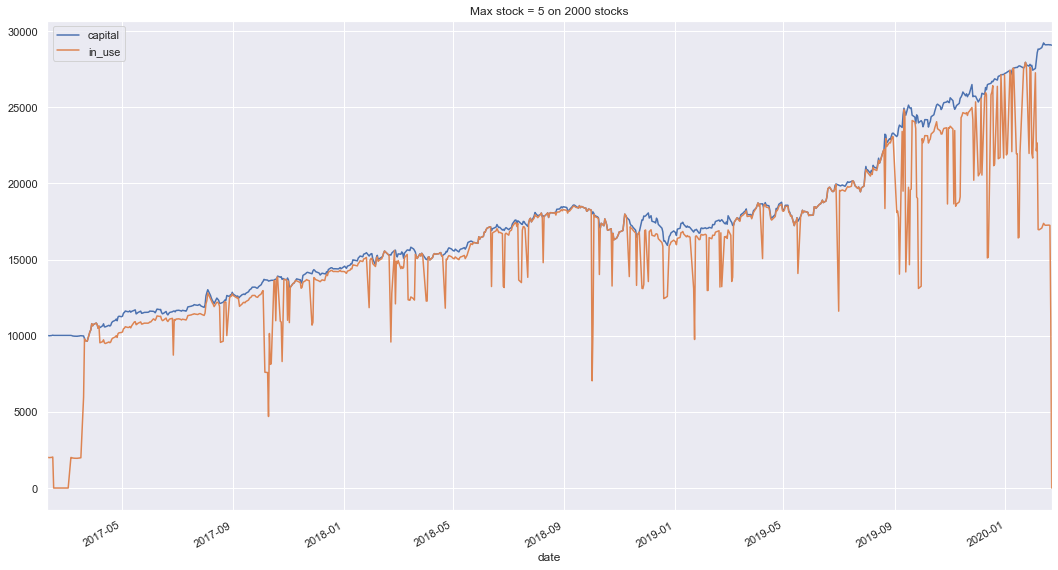

In [7]:
#myPnL_df, my_Capital_df = backtester()
myCapital_df = my_Capital_df
myCapital_df.index = myCapital_df.date
to_plot_cols = ['capital', 'in_use']
myCapital_df[to_plot_cols][first_buy_date:].plot(figsize=(18,10))
plt.title('Max stock = 5 on 2000 stocks')
plt.show()

# Analysis of Results

The cells below perform a simple analysis. They look at the completed trades. For each trade it calculates the gain and gain percentage. With that it then displays the top ten losses and top ten gains. It ends with calculating the percentage of trades that resulted in a loss.

In [8]:
sell_df = myPnL_df[myPnL_df.action=='SELL'].copy()
sell_df['gain'] = (sell_df.close_amount - sell_df.orig_amount)
sell_df['gain_pct'] = round((sell_df.gain / sell_df.orig_amount)*100, 2)
sell_df

,date,ticker,action,orig_amount,close_amount,no_shares,stop_loss,daily_gain,daily_return,invested,gain,gain_pct
0,2017-02-15,ORIT,SELL,2000.000000,2018.361582,141.242938,12.744,-16.949153,-0.832755,0,18.361582,0.92
0,2017-03-22,DRQ,SELL,1996.641887,1983.267253,38.213242,47.025,-13.374635,-0.669856,0,-13.374635,-0.67
0,2017-03-22,TOWN,SELL,2000.016493,1866.028460,65.360016,27.540,-24.183206,-1.279391,0,-133.988033,-6.70
0,2017-03-22,CPB,SELL,1962.493912,1962.493912,37.973953,46.512,0.000000,0.000000,0,0.000000,0.00
0,2017-03-24,FEIM,SELL,1954.982344,1928.078917,179.356178,9.810,-12.554932,-0.646950,0,-26.903427,-1.38
...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020-02-04,DRI,SELL,5543.889224,5643.515140,48.836233,102.168,31.255189,0.556909,0,99.625916,1.80
0,2020-02-06,GRPN,SELL,5487.080324,5922.262557,1892.096664,2.610,75.683867,1.294498,0,435.182233,7.93
0,2020-02-20,REGN,SELL,5391.475846,6232.488615,15.614793,310.752,-26.076705,-0.416656,0,841.012770,15.60
0,2020-02-21,CPB,SELL,5296.414069,5334.229709,111.222471,42.858,24.468944,0.460829,0,37.815640,0.71


In [9]:
sell_df.describe()

,orig_amount,close_amount,no_shares,stop_loss,daily_gain,daily_return,invested,gain,gain_pct
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000
mean,3459.308860,3524.614573,227.128334,48.320259,-3.112169,-0.139104,0.0,65.305713,1.998322
std,988.267454,1034.848815,515.216215,51.889006,87.600809,2.538663,0.0,274.812402,8.343199
min,1843.660917,1843.660917,5.825200,0.477000,-563.053894,-20.416667,0.0,-681.726821,-20.420000
25%,2730.690152,2773.665071,44.277064,14.679000,-28.420379,-0.859855,0.0,-27.761773,-0.870000
50%,3384.484700,3391.012953,111.104049,30.379500,0.000000,0.000000,0.0,17.526561,0.460000
75%,3851.593146,3960.337310,193.301554,65.659500,31.449456,0.934131,0.0,118.591470,3.570000
max,5543.889224,6232.488615,6415.773057,345.123000,571.460948,14.551084,0.0,2043.424475,58.580000


In [10]:
sell_df.sort_values(by='gain_pct', ascending=True)[0:10]

,date,ticker,action,orig_amount,close_amount,no_shares,stop_loss,daily_gain,daily_return,invested,gain,gain_pct
0,2017-11-02,OPCH,SELL,2757.814989,2194.761095,287.272395,8.640,-563.053894,-20.416667,0,-563.053894,-20.42
0,2018-11-20,TGT,SELL,3625.277139,2974.265359,44.712348,72.972,-350.097681,-10.531271,0,-651.011780,-17.96
0,2019-12-02,OPCH,SELL,5150.824867,4469.098047,378.737123,12.240,-242.391758,-5.144695,0,-681.726821,-13.24
0,2018-10-02,SYX,SELL,3656.787647,3220.234789,131.491825,25.029,-94.674114,-2.856010,0,-436.552858,-11.94
0,2018-12-24,IQV,SELL,3202.802737,2823.017423,26.707828,107.928,-67.303727,-2.328590,0,-379.785315,-11.86
0,2018-07-23,AGRX,SELL,3400.359720,3002.581791,6415.773057,0.477,-109.068142,-3.505155,0,-397.777930,-11.70
0,2018-12-20,CVI,SELL,3196.734545,2834.004572,94.215578,30.537,-114.000849,-3.867050,0,-362.729973,-11.35
0,2017-10-25,MBI,SELL,2728.225107,2420.764646,389.190458,6.309,-167.351897,-6.466165,0,-307.460461,-11.27
0,2018-03-08,AMWD,SELL,3058.402369,2714.444875,22.554590,122.040,-149.988022,-5.236220,0,-343.957494,-11.25
0,2018-04-02,OPCH,SELL,3055.193693,2714.422088,293.768624,9.360,-176.261175,-6.097561,0,-340.771604,-11.15


In [11]:
sell_df.sort_values(by='gain_pct', ascending=False)[0:10]

,date,ticker,action,orig_amount,close_amount,no_shares,stop_loss,daily_gain,daily_return,invested,gain,gain_pct
0,2019-09-05,MEDP,SELL,3488.398392,5531.822867,66.865984,46.953,89.600419,1.646394,0,2043.424475,58.58
0,2017-04-07,SYX,SELL,2000.016493,3127.097611,368.327163,4.887,29.466173,0.951249,0,1127.081118,56.35
0,2019-09-13,TGT,SELL,4153.316638,5393.753663,50.526966,73.980,-46.990079,-0.863670,0,1240.437025,29.87
0,2018-11-26,OPCH,SELL,3477.400659,4498.735119,303.968589,10.296,571.460948,14.551084,0,1021.334459,29.37
0,2018-03-05,PANW,SELL,2820.930671,3597.150542,19.954238,127.233,69.839834,1.979974,0,776.219871,27.52
0,2018-02-21,TGT,SELL,2345.053139,2986.275206,43.531709,48.483,4.353171,0.145985,0,641.222067,27.34
0,2019-08-21,PRPL,SELL,3885.319917,4880.933146,607.081237,5.760,-60.708124,-1.228501,0,995.613229,25.62
0,2017-09-08,SYX,SELL,2396.076307,2999.994425,178.146937,12.105,-60.569959,-1.979045,0,603.918118,25.20
0,2018-08-10,IQV,SELL,3158.503432,3911.404383,32.285633,88.047,-17.757098,-0.451931,0,752.900951,23.84
0,2019-09-27,SPPI,SELL,4651.280584,5472.821511,617.699945,6.777,-166.778985,-2.957284,0,821.540927,17.66


In [12]:
sell_df[sell_df.gain_pct < 0].count()[0], sell_df[sell_df.gain_pct < 0].count()[0]/len(sell_df)

(105, 0.3595890410958904)

In [13]:
myPnL_df

,date,ticker,action,orig_amount,close_amount,no_shares,stop_loss,daily_gain,daily_return,invested
0,2017-02-08,ORIT,BUY,2000.000000,2000.000000,141.242938,12.744,0.000000,0.000000,0
0,2017-02-08,ORIT,CLOSE,2000.000000,2000.000000,141.242938,12.744,0.000000,0.000000,0
0,2017-02-09,ORIT,CLOSE,2000.000000,2007.062147,141.242938,12.744,7.062147,0.353107,0
0,2017-02-10,ORIT,CLOSE,2000.000000,1994.350282,141.242938,12.744,-12.711864,-0.633357,0
0,2017-02-13,ORIT,CLOSE,2000.000000,2012.711864,141.242938,12.744,18.361582,0.920680,0
...,...,...,...,...,...,...,...,...,...,...
0,2020-02-20,REGN,SELL,5391.475846,6232.488615,15.614793,310.752,-26.076705,-0.416656,0
0,2020-02-20,CPB,CLOSE,5296.414069,5309.760765,111.222471,42.858,-5.561124,-0.104624,0
0,2020-02-20,TGT,CLOSE,5478.413925,5713.706948,48.314789,102.051,42.033866,0.741119,0
0,2020-02-21,CPB,SELL,5296.414069,5334.229709,111.222471,42.858,24.468944,0.460829,0


In [14]:
sell_df.ticker.unique(), len(sell_df.ticker.unique())

(array(['ORIT', 'DRQ', 'TOWN', 'CPB', 'FEIM', 'GRIF', 'GS', 'VZ', 'JVA',
        'SLG', 'CRL', 'SYX', 'MBI', 'AMWD', 'REGN', 'CVI', 'MDP', 'BLDR',
        'PEBK', 'OPCH', 'SPPI', 'PCAR', 'VSH', 'TGT', 'AMT', 'HWC', 'OTEX',
        'TRNS', 'BB', 'VIVO', 'TGA', 'DLX', 'FCFS', 'PGR', 'BXP', 'IPG',
        'BOCH', 'GRPN', 'DRI', 'DSGX', 'EXLS', 'FHB', 'MRC', 'FOR', 'TRIP',
        'PANW', 'CVX', 'USPH', 'INVH', 'GWB', 'HLT', 'AGRX', 'BMCH', 'IQV',
        'LIND', 'GGG', 'PRPL', 'ORC', 'PSDO', 'MEDP'], dtype=object), 60)

In [15]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=False)[0:10]

,ticker,gain
50,SYX,2702.811967
52,TGT,2621.294628
35,MEDP,2043.424475
9,CRL,1602.476137
55,TRNS,1153.437786
49,SPPI,1137.816100
41,PANW,1041.448151
5,BMCH,1031.595650
37,OPCH,1006.713486
59,VZ,868.911235


In [16]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=True)[0:10]

,ticker,gain
0,AGRX,-567.180932
58,VSH,-401.675185
51,TGA,-385.096951
10,CVI,-289.747230
40,OTEX,-286.288485
54,TRIP,-281.113732
17,FCFS,-268.442926
56,USPH,-237.088840
33,MBI,-194.153526
2,AMWD,-162.707232


In [17]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=False)[0:10]

,ticker,gain
35,MEDP,2043.424475
52,TGT,291.254959
23,GRPN,271.339690
50,SYX,270.281197
41,PANW,260.362038
38,ORC,241.620828
32,LIND,231.017077
30,IQV,198.633598
47,REGN,192.673646
49,SPPI,189.636017


In [18]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=True)[0:10]

,ticker,gain
0,AGRX,-283.590466
3,BB,-111.696738
46,PSDO,-68.885273
17,FCFS,-67.110731
51,TGA,-64.182825
40,OTEX,-57.257697
54,TRIP,-56.222746
58,VSH,-50.209398
33,MBI,-48.538382
56,USPH,-47.417768


# Suspicious Stocks

Below are the plotted close price plots as returned by yfinance. 

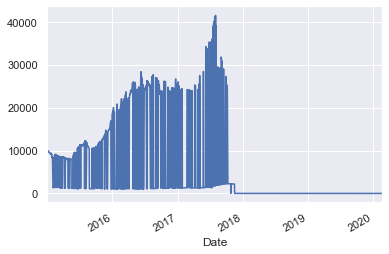

In [19]:
# Google shows close price between $8 - $16, so something seems to be wrong here
asset  = yf.Ticker('SBT')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

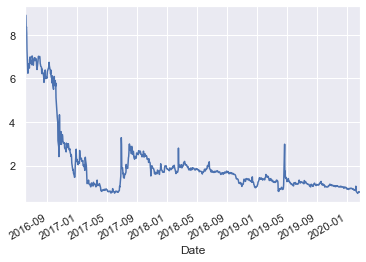

In [20]:
# Data looks okay - there's just a quick change around 2019-04-22 and then a big drop on 2019-04-23.
# Trade is still profitable. Modified the stop_loss logic to match what stockbrokers do...
asset  = yf.Ticker('MBRX')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

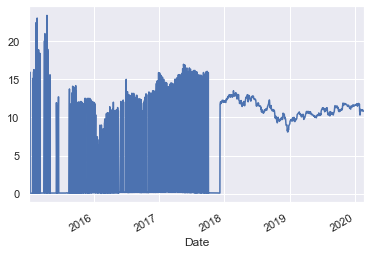

In [21]:
# LBC stock looks suspicious => exclude and rerun...
asset  = yf.Ticker('LBC')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

In [22]:
myCapital_df.tail()

,date,capital,in_use,free
date,,,,
2020-02-14,2020-02-14,29101.1,17251.8,11849.2
2020-02-18,2020-02-18,29112.3,17263.1,11849.2
2020-02-19,2020-02-19,29094.8,17245.6,11849.2
2020-02-20,2020-02-20,29105.2,11023.5,18081.7
2020-02-21,2020-02-21,29069.3,1.45519e-11,29069.3


In [23]:
len(possible_trades_df)

981